# Imputation
Each XLS or XLSX file contains a dataframe. ​

Load each XLS or XLSX file in your Jupyter notebook. ​

For each dataframe, address missing values by taking the following steps:​

Count the number of missing values in the dataframe; count the number of missing values per column​

Plot the distribution of data points using a histogram​

Create a lag plot (a lag plot shows t versus t+1)​

Based on the lag plot, state in a markdown cell whether the order of this data matters. ​

Do one of the following (not both):​
- If the order of the data matters, then interpolate the missing values​
- If the order of the data does not matter, fill in the missing data by sampling from the distribution​

Create a scatter plot using the columns in dataframe; no Nan entries should be present​

Submit a single Jupyter notebook with your analysis of the XLSX and XLS files.​

Perform interpolation or sampling programmatically using Python (not manually)​ ​ ​

In [8]:
!pip install xlrd #for the xls file

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.5/96.5 kB 2.7 MB/s eta 0:00:00a 0:00:01


In [9]:
import pandas as pd
import numpy as np

#### Load the Data

In [10]:
df1 = pd.read_excel('imputation_homework_29.xlsx', index_col=[0])
df2 = pd.read_excel('imputation_homework_91.xlsx',  index_col=[0])
df3 = pd.read_excel('imputation_homework_04.xls', index_col = [0])

In [12]:
df1.head()

,x,y
0,1.40,10.00
1,1.45,10.25
2,1.50,10.50
3,1.55,10.75
4,1.60,11.00


In [13]:
df2.head()

,date,value
0,2015-11-03,30.001248
1,2015-11-04,4.655104
2,2015-11-05,15.621201
3,2015-11-06,22.982759
4,2015-11-07,39.994644


In [14]:
df3.head()

,time,value
0,0.00,0.000000
1,0.02,2.528779
2,0.04,2.419020
3,0.06,0.665052
4,0.08,0.506655


#### Count the missing Values:

In [41]:
def count_missing_value(df): #function to get the missing values
    missing_values = df.isnull().sum().sum()
    print(f'Total missing values in the data: {missing_values}')
    missing_values_column = df.isnull().sum()
    print("Missing values per column:")
    print(missing_values_column)

### Histogram for the data points:

In [29]:
import matplotlib.pyplot as plt

#### Histogram for data frame 1: distribution of x and y:

In [43]:
print(count_missing_values(df1))

Total missing values in the data: 9
None


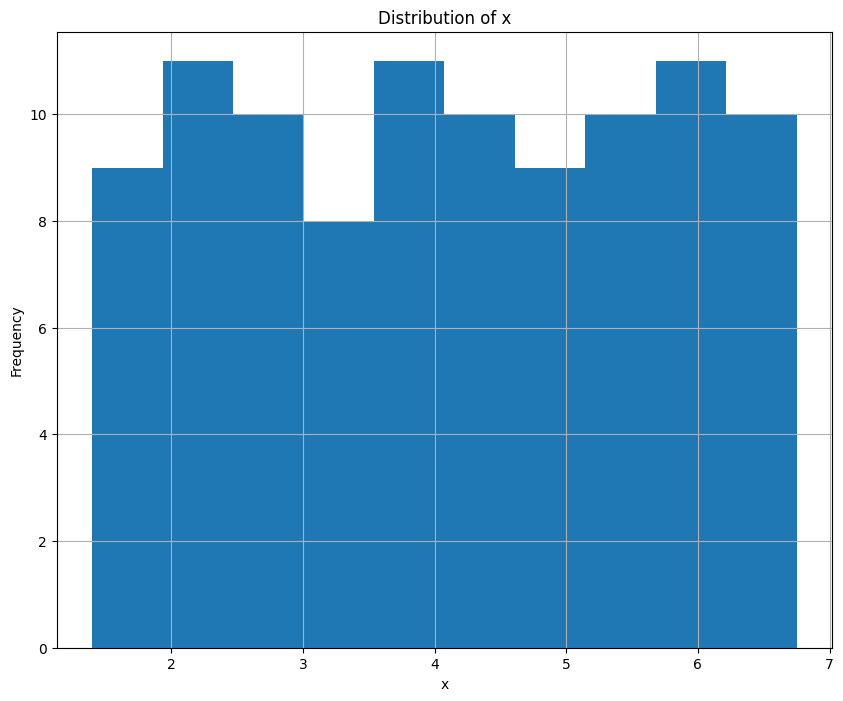

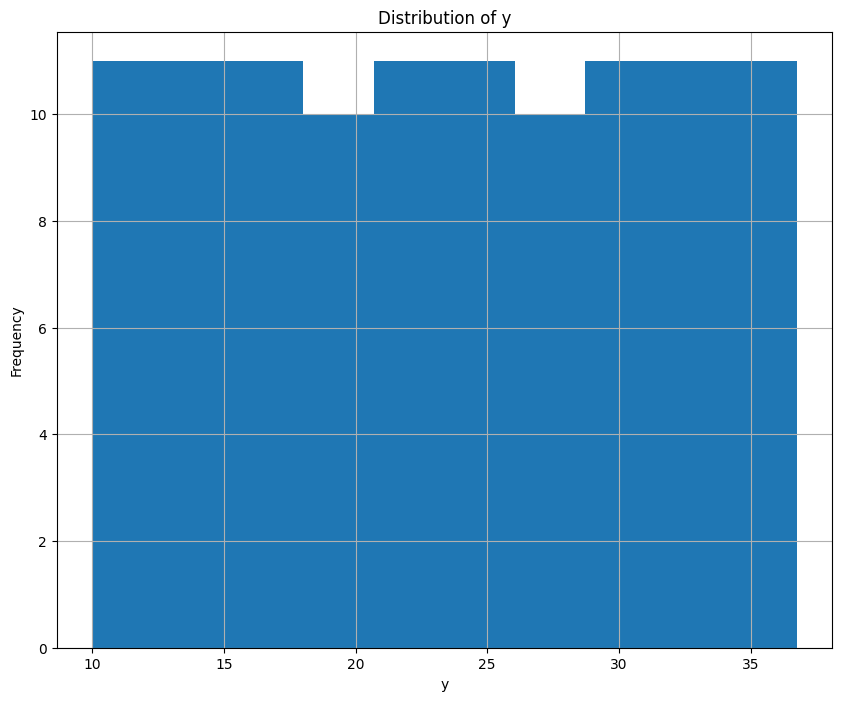

In [32]:
for column in df1.columns: 
    plt.figure(figsize=(10,8))
    df1[column].hist()
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

#### Histogram for data frame 2: distribution of date and value

In [44]:
print(count_missing_values(df2))

Total missing values in the data: 84
None


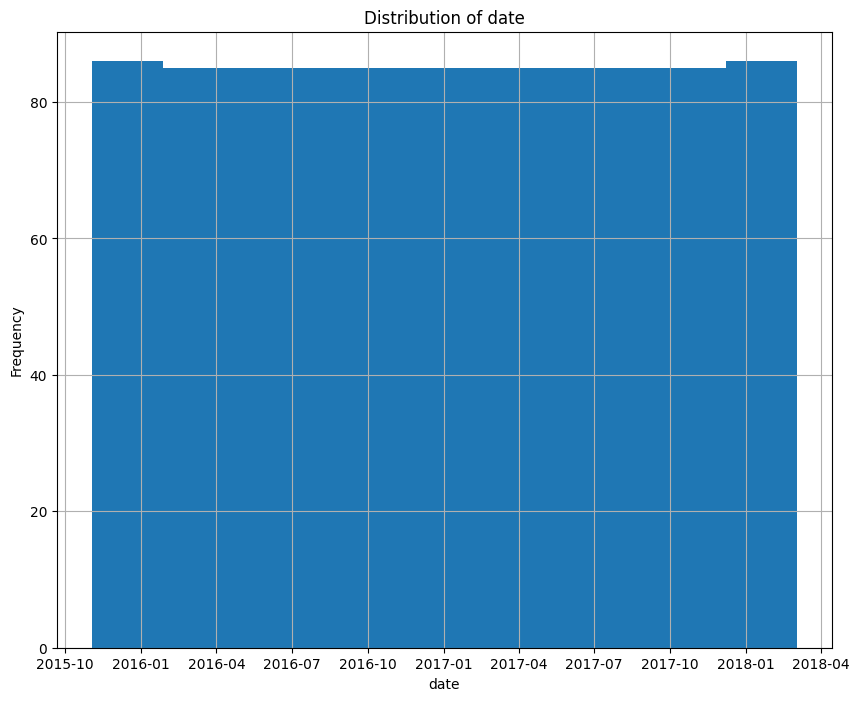

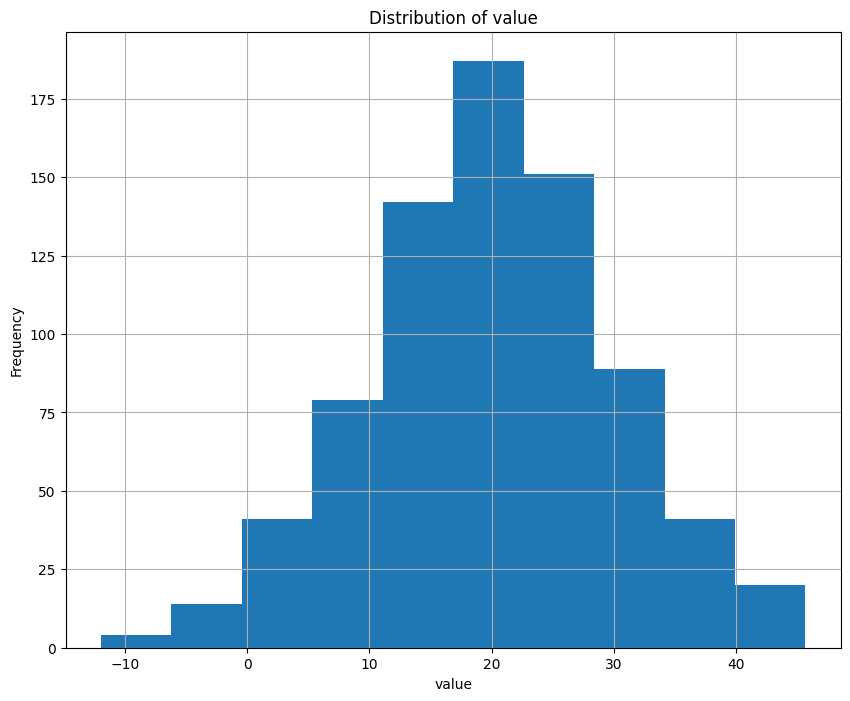

In [34]:
for column in df2.columns: 
    plt.figure(figsize=(10,8))
    df2[column].hist()
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

#### Histogram for data frame 3: distribution of time and value

In [45]:
print(count_missing_values(df3))

Total missing values in the data: 50
None


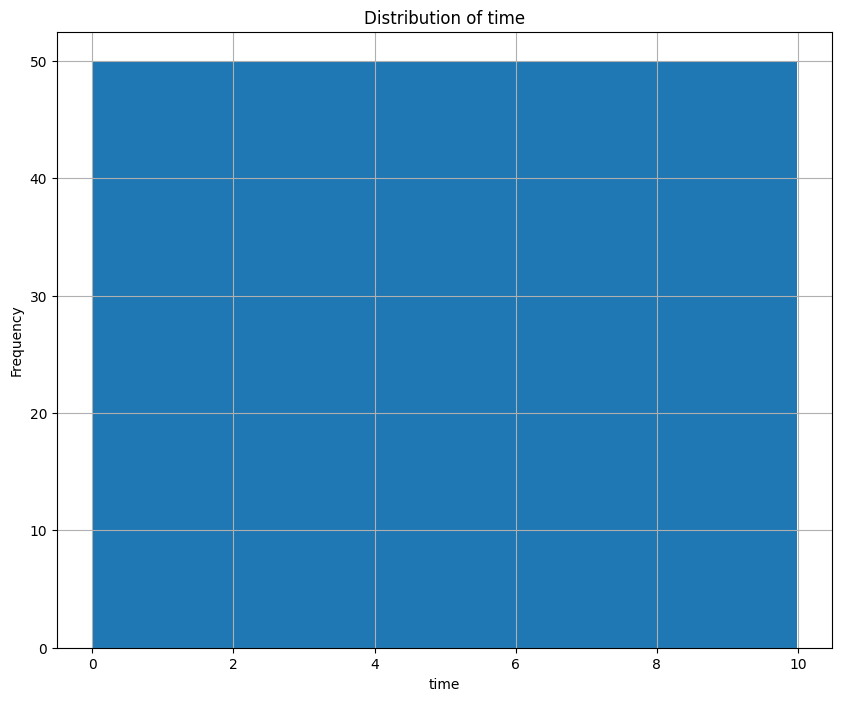

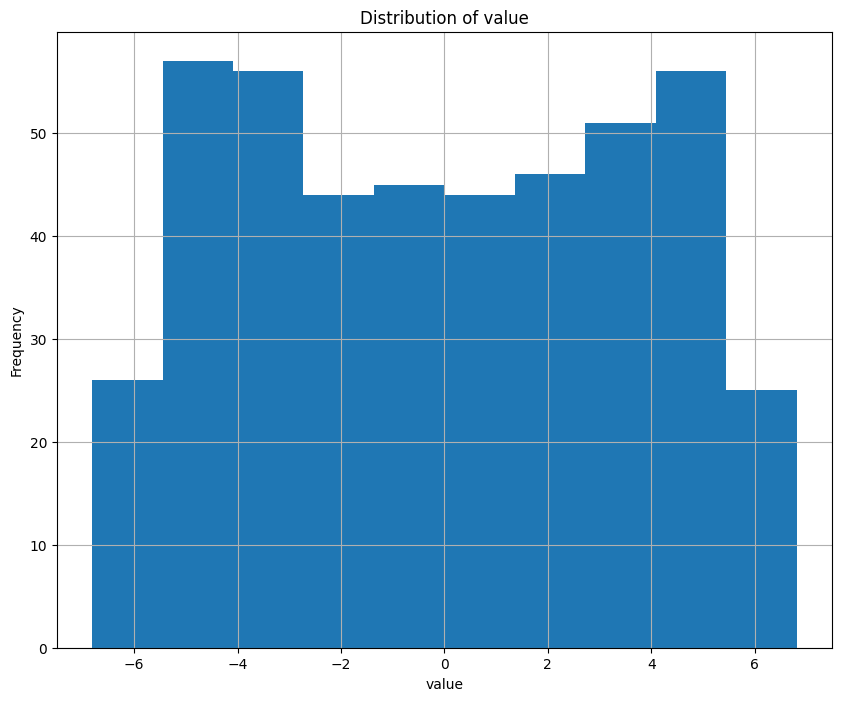

In [35]:
for column in df3.columns: 
    plt.figure(figsize=(10,8))
    df3[column].hist()
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

### Lag Plot that shows t versus t+1

In [46]:
from pandas.plotting import lag_plot

#### Lag Plot for Data 1: X and Y

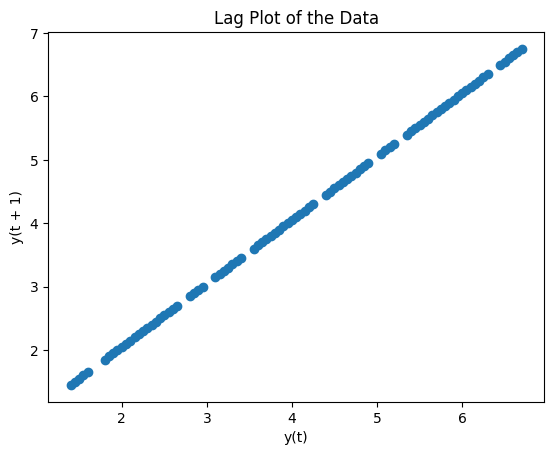

In [52]:
plt.figure()
lag_plot(df1['x'])
plt.title('Lag Plot of the Data')
plt.show()

The lag plot shows that: there is a strong correlation between x and y and the order of the data matters. Ref: https://www.geeksforgeeks.org/lag-plots/

#### Interpolate the dataframe: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.interpolate.html

In [56]:
df2 = df2.interpolate()
print(count_missing_values(df2))

Total missing values in the data: 0
None


#### Lag Plot for Data 2: Date and Value

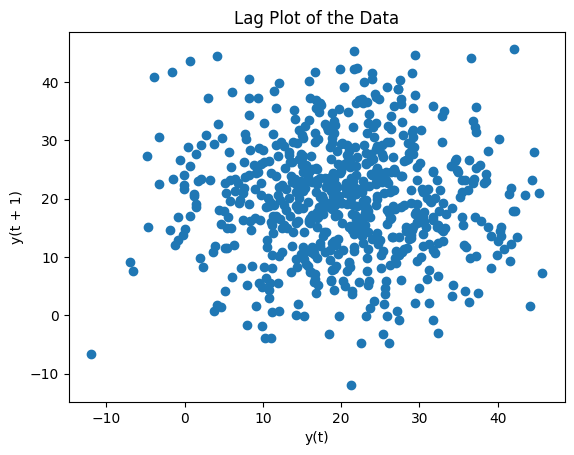

In [51]:
plt.figure()
lag_plot(df2['value'])
plt.title('Lag Plot of the Data')
plt.show()

The lag plot shows that the correlation is not present and it is a random plot, showing order does not matter. 

#### Filing missing values with sampling data

In [60]:
def sampling_data(df2, value):
    non_missing_value = df2[value].dropna()
    df2[value] = df2[value].apply(
    lambda x: np.random.choice(non_missing_value) if pd.isnull(x) else x
    )
    return df2

In [62]:
df2 = sampling_data(df2, 'value')

In [63]:
df2

,date,value
0,2015-11-03,30.001248
1,2015-11-04,4.655104
2,2015-11-05,15.621201
3,2015-11-06,22.982759
4,2015-11-07,39.994644
...,...,...
847,2018-02-27,13.552134
848,2018-02-28,14.196152
849,2018-03-01,21.058815
850,2018-03-02,21.038230


#### Lag Plot for Data 3: Time and Value

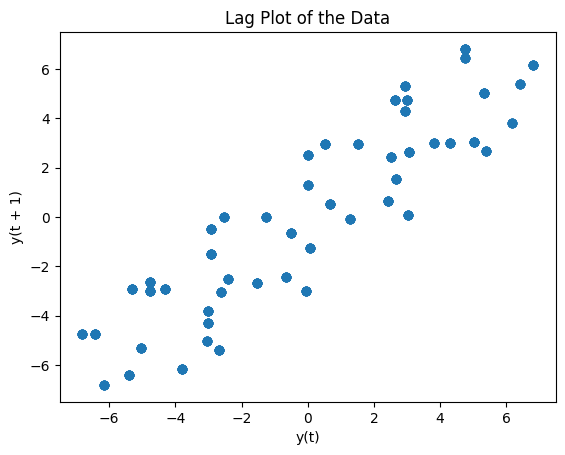

In [54]:
plt.figure()
lag_plot(df3['value'])
plt.title('Lag Plot of the Data')
plt.show()

The lag plot shows that the data follows a pattern and it seems to be linear, showing that the order does matter.

#### Interpolate the dataframe: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.interpolate.html

In [64]:
df3 = df3.interpolate()
print(count_missing_values(df3))

Total missing values in the data: 0
None


### Scatterplots for the Data
https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html

#### Scatter Plot for Data 1: X and Y

In [70]:
df1.columns

Index(['x', 'y'], dtype='object')

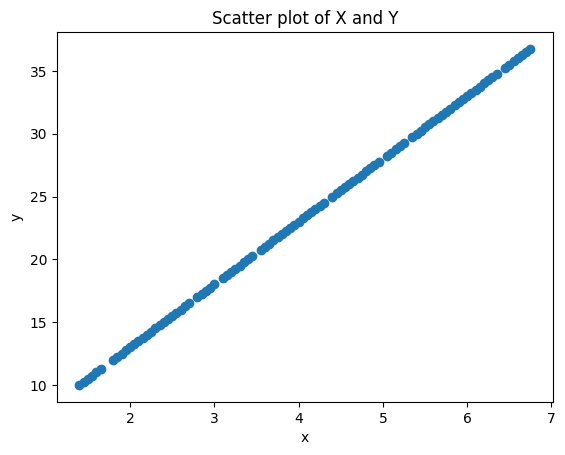

In [71]:
plt.scatter(df1['x'],df1['y'])
plt.title('Scatter plot of X and Y')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

#### Scatter Plot for Data 2: Date and Value

In [72]:
df2.columns

Index(['date', 'value'], dtype='object')

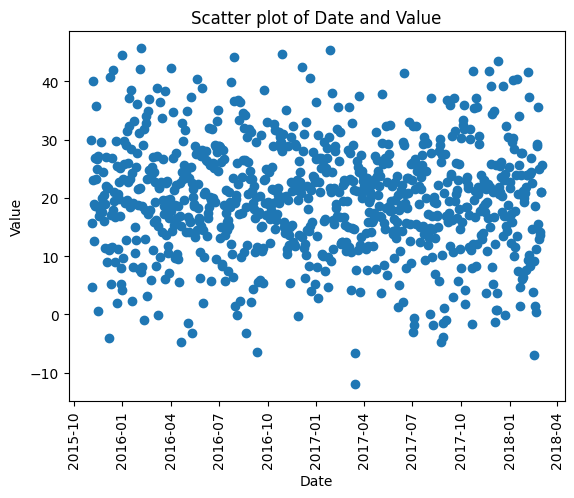

In [80]:
plt.scatter(df2['date'],df2['value'])
plt.title('Scatter plot of Date and Value')
plt.xlabel('Date')
plt.ylabel('Value')
plt.xticks(rotation = 90)
plt.show()

#### Scatter Plot for Data 3: Time and Value

In [81]:
df3.columns

Index(['time', 'value'], dtype='object')

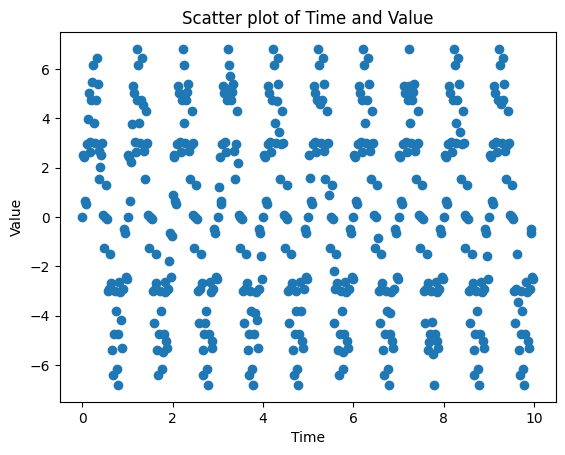

In [82]:
plt.scatter(df3['time'],df3['value'])
plt.title('Scatter plot of Time and Value')
plt.xlabel('Time')
plt.ylabel('Value')
plt.show()